In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
colab = True

if colab:
    from google.colab import drive
    drive.mount('/content/drive')
    os.chdir('/content/drive/MyDrive/Tesis/tesis/generative')
else:
    os.chdir('../generative')

Mounted at /content/drive


In [3]:
import os
import shutil
import sys
import json

import argparse
import models
from sampling.sampling_utils import get_vae_sample, get_diffusion_sample

sys.path.append(os.path.abspath("../model_utils"))
from model_utils.diffusion_utils import calc_diffusion_hyperparams

import soundfile as sf
import torch


In [4]:
### Parametros del script
from collections import namedtuple

Args = namedtuple('Args', [
    'model',
    'number_samples',
    'folder_generated_data',
    'config'
])

args = Args(
    model='DIFFUSION',
    number_samples=1,
    folder_generated_data=50,
    config='./config.json')

with open(args.config, 'r') as f:
    config = json.load(f)
    sr = config['audio_config']['sample_rate']

In [53]:
# sr = 1600
device = "cuda" if torch.cuda.is_available() else "cpu"
model = torch.load(f'./models_trained/DIFFUSION/75_DIFFUSION_model.pth', map_location=device)

In [54]:
from sampling.sampling_utils import get_diffusion_sample
import sys
sys.path.append(os.path.abspath("../model_utils"))
from model_utils.diffusion_utils import calc_diffusion_hyperparams

diffusion_config = config['diffusion_config']
diffusion_hyperparams = calc_diffusion_hyperparams(**diffusion_config)
samples = get_diffusion_sample(model, (2, 1, sr), diffusion_hyperparams)

begin sampling, total number of reverse steps = 200


Reverse process: 100%|██████████| 200/200 [01:38<00:00,  2.04it/s]


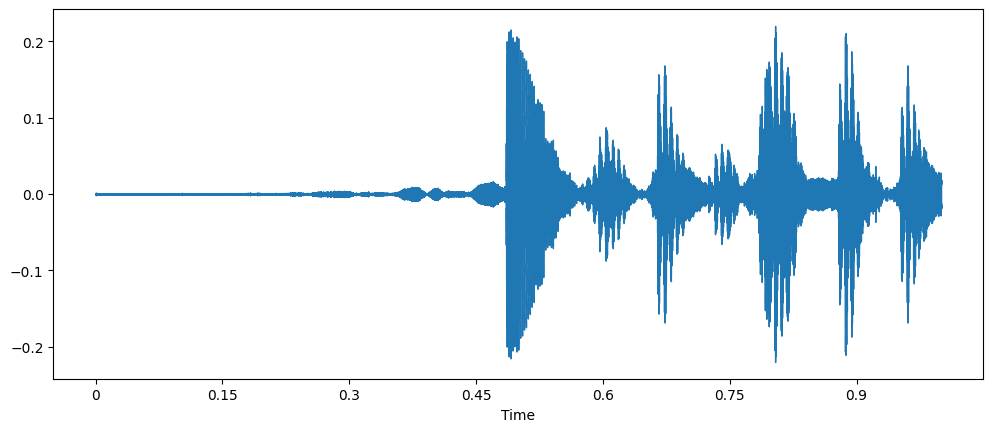

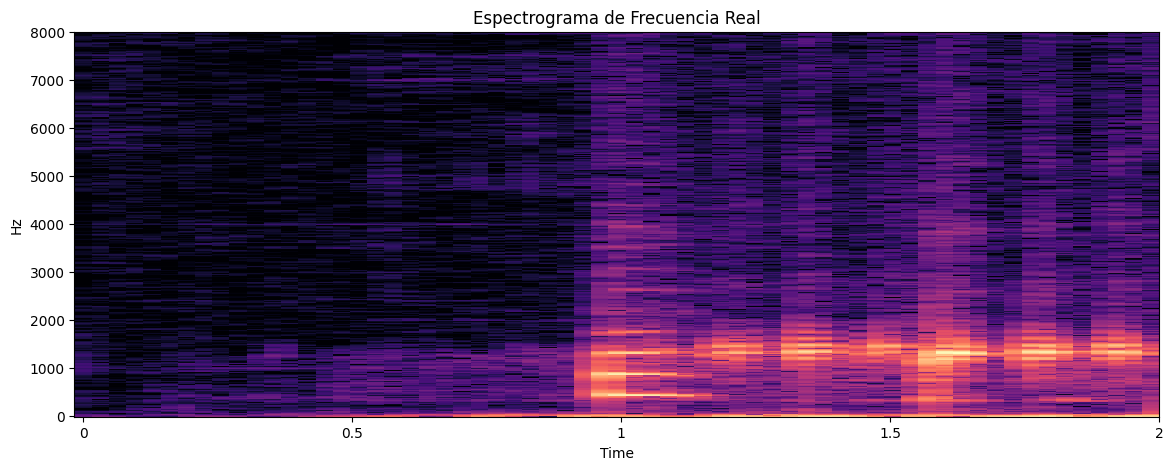

In [56]:
import matplotlib.pyplot as plt
import librosa
import numpy as np
from IPython.display import Audio

h = samples.cpu().numpy()[1][0]
plt.figure().set_figwidth(12)
librosa.display.waveshow(h, sr=sr)
# Perform a Short-Time Fourier Transform (STFT)
D = librosa.stft(h,n_fft= 1024)
# Convert the complex-valued result to magnitude
S_db = librosa.amplitude_to_db(abs(D), ref=np.max)
# Display the spectrogram
plt.figure(figsize=(14, 5))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
# plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de Frecuencia Real')
plt.show()
Audio(data=h, rate=sr)

tensor(0.8643, grad_fn=<AddBackward0>)